In this exercise, I analyze data from the E8.12 data set from the R package SenSrivastava. The E8.12 data frame has 11 rows and 3 columns. The first column, 'Country', contains a vector of 11 selected countries. The second column, 'y', contains a vector of male deaths in 1950 for lung cancer, per million. Finally, the third column, 'x', contains observations of per capita cigarette consumption in 1930.

This data was taken from Tufte, (1974) $\textit{Data Analysis for Politics and Policy}$. Englewood Cliffs, N.J.: Prentice-Hall. Data are adapted.

In [1]:
#install.packages("calibrate", repos="http://cran.rstudio.com/")
#install.packages("SenSrivastava", repos="http://cran.rstudio.com/")

In the first part of my analysis, I fit a simple linear regression using male deaths per million (Y) as my response variable and per capita cigarette consumption (X) as my predictor variable and I find the least square estimates for the coefficients. I also calculate a 95% confidence interval for both coefficients.

In [2]:
library(calibrate)
library(SenSrivastava)
library(MASS)
data(E8.12)

Y <- E8.12$y # Response
X <- E8.12$x # Predictor
n <- length(X)

lm <- lm(Y~X)
(lms <- summary(lm))

coefficients <- c('beta0', 'beta1')

beta0.hat <- coef(lms)[1]
beta1.hat <- coef(lms)[2]
beta.hat <- c(beta0.hat, beta1.hat)

txx <- sum((X - mean(X))^2)
MSE <- sum(lms$residuals^2)/(n-2)

# Calculate standard deviations
s.beta0.hat <- sqrt(MSE * (1/n + mean(X)^2/(txx)))
s.beta1.hat <- sqrt(MSE/txx)
s.beta.hat <- c(s.beta0.hat, s.beta1.hat)

Yhat <- beta0.hat + beta1.hat * X

lower.bound <- beta.hat - qt(1 - 0.05/2, df = n-2)*s.beta.hat
upper.bound <- beta.hat + qt(1 - 0.05/2, df = n-2)*s.beta.hat

(beta.intervals <- cbind(coefficients, lower.bound, beta.hat, upper.bound))

Loading required package: MASS



Call:
lm(formula = Y ~ X)

Residuals:
     Min       1Q   Median       3Q      Max 
-169.016  -32.813    0.004   45.804  136.914 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 65.74886   48.95871   1.343  0.21217   
X            0.22912    0.06921   3.310  0.00908 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 84.13 on 9 degrees of freedom
Multiple R-squared:  0.549,	Adjusted R-squared:  0.4989 
F-statistic: 10.96 on 1 and 9 DF,  p-value: 0.009081


coefficients,lower.bound,beta.hat,upper.bound
beta0,-45.0034405297219,65.7488570215489,176.50115457282
beta1,0.0725402380766388,0.229115337755516,0.385690437434394


Below, I look for influential points which if removed from the data would significantly change the fit.

To find influential points, I first calculate and plot leverage, which measures a point's ability to move the regression model all by itself by simply moving in the y-direction.

I notice that United States has the highest leverage, followed by Great Britain then Finland.

,Country,y,x
4,United States,190,1280


,Country,y,x
4,United States,190,1280
6,Great Britain,465,1145
11,Finland,350,1115


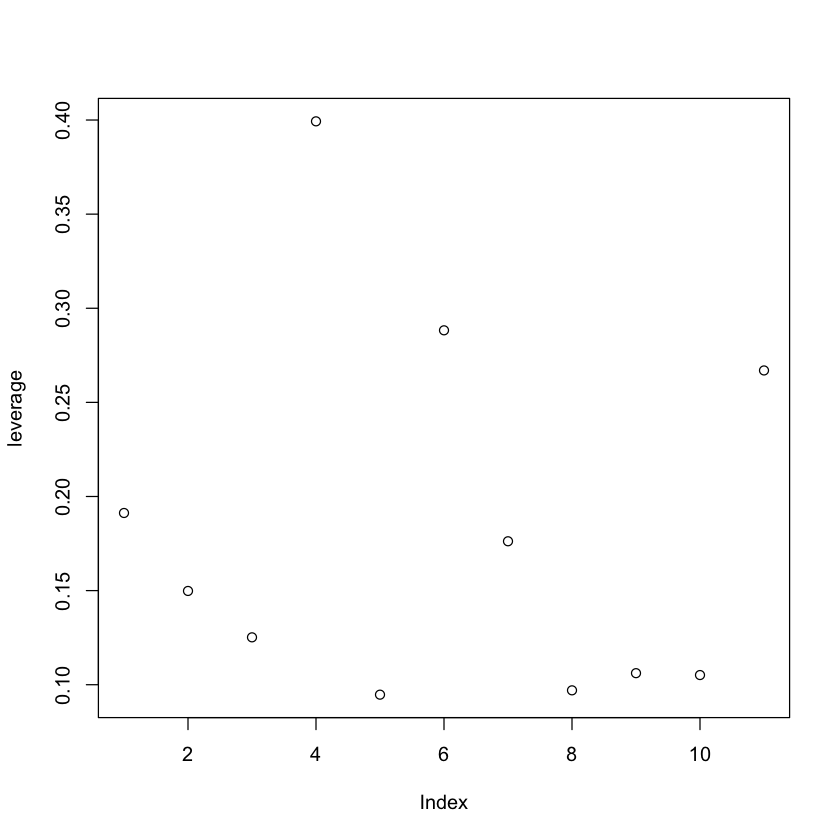

In [3]:
leverage = hat(model.matrix(lm))
plot(leverage)
E8.12[leverage >0.35,]
E8.12[leverage >0.25,]

Next, I plot the model and highlight the highest leverage point (United States) in red and the next 2 highest leverage points (Great Britain and Finland) in green.

From the plot, The United States and Great Britain are far from the regression line and thus may be potential influential points, but Finland lies relatively close to the regression line and thus does not seem to be a likely candidate for an influential point.

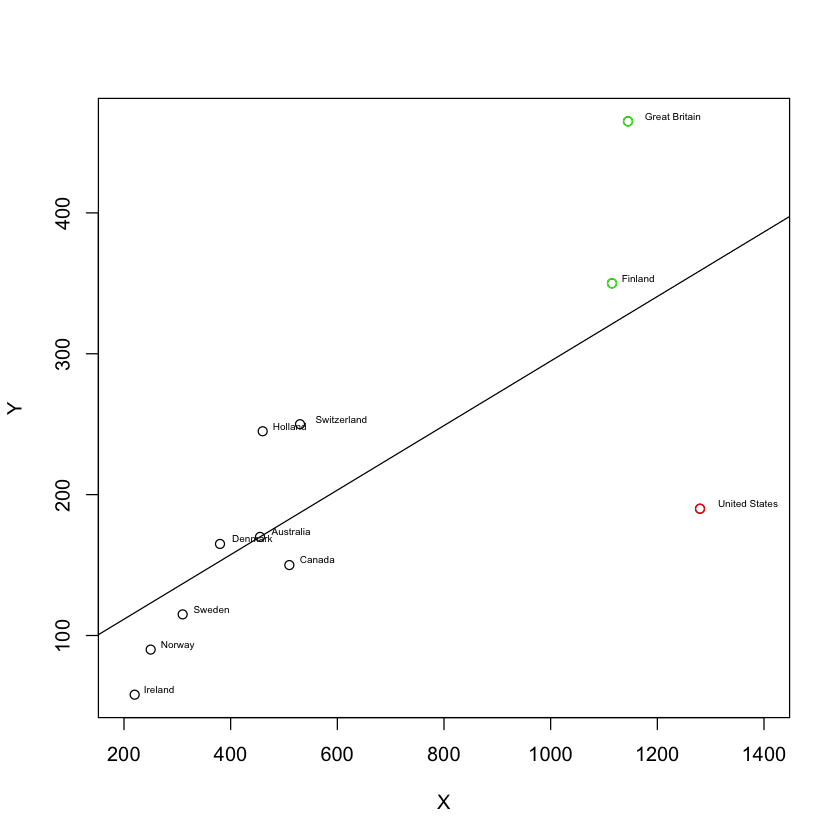

In [4]:
plot(X, Y, xlim=c(200,1400))
textxy(X, Y, E8.12$Country)
abline(lm)
points(E8.12[4,]$x, E8.12[4,]$y, col='red')
points(E8.12[c(6,11),]$x, E8.12[c(6,11),]$y, col='green')
#lm$res
r <- rstudent(lm)

Influential points may be outliers, high leverage points, or both and Cook's distance combines both properties to measure a point's influence.

Generally, points with a Cook's distance greater than 1 are classified as influential.

As we can see from the plot below, the United States (in red) has a very high Cook's distance and Great Britain (the green point in the middle of the plot) also has a high Cook's distance compared to all of the other points.
Finland (green point on the bottom right), on the other hand, does not have a relatively high Cook's distance and thus, I would not categorize it as an influential point.

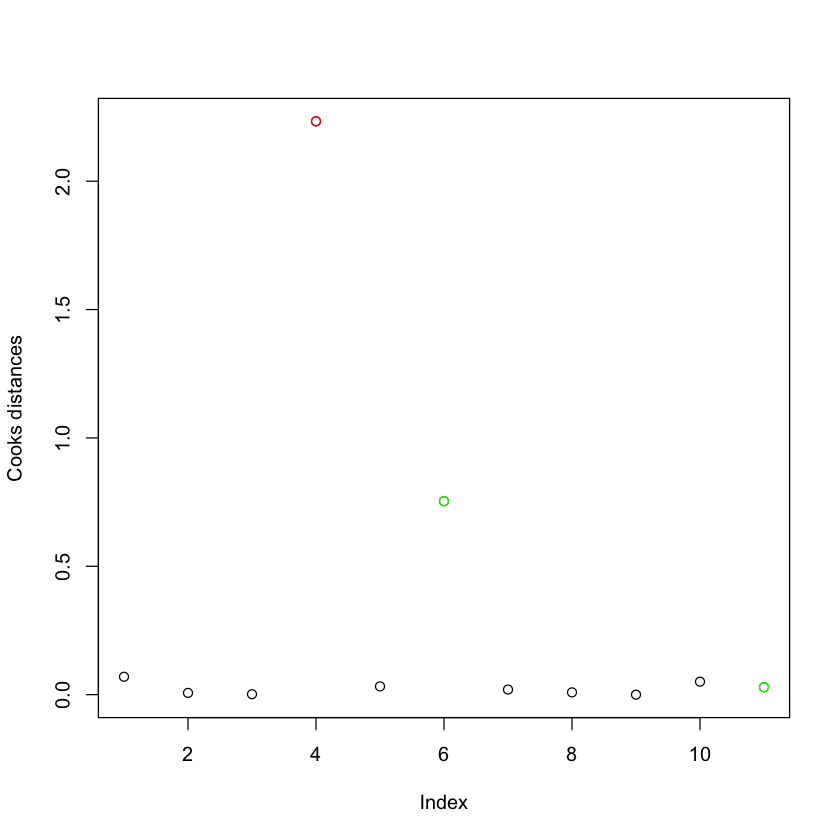

In [5]:
cook = cooks.distance(lm)
plot(cook,ylab="Cooks distances")
points(4,cook[4],col='red')
points(c(6,11),cook[c(6,11)],col='green')

Since the United States seems to be a very influential point, I delete this point and refit a simple linear regression.


Call:
lm(formula = Y ~ X)

Residuals:
    Min      1Q  Median      3Q     Max 
-62.353 -28.923  -7.861  35.321  66.919 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.55343   28.26713   0.479    0.644    
X            0.35767    0.04547   7.867 4.93e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 44.92 on 8 degrees of freedom
Multiple R-squared:  0.8855,	Adjusted R-squared:  0.8712 
F-statistic: 61.88 on 1 and 8 DF,  p-value: 4.928e-05


coefficients,lower.bound,beta.hat,upper.bound
beta0,-63.731333502006,65.7488570215489,195.229047545104
beta1,0.0208518530220454,0.229115337755516,0.437378822488988


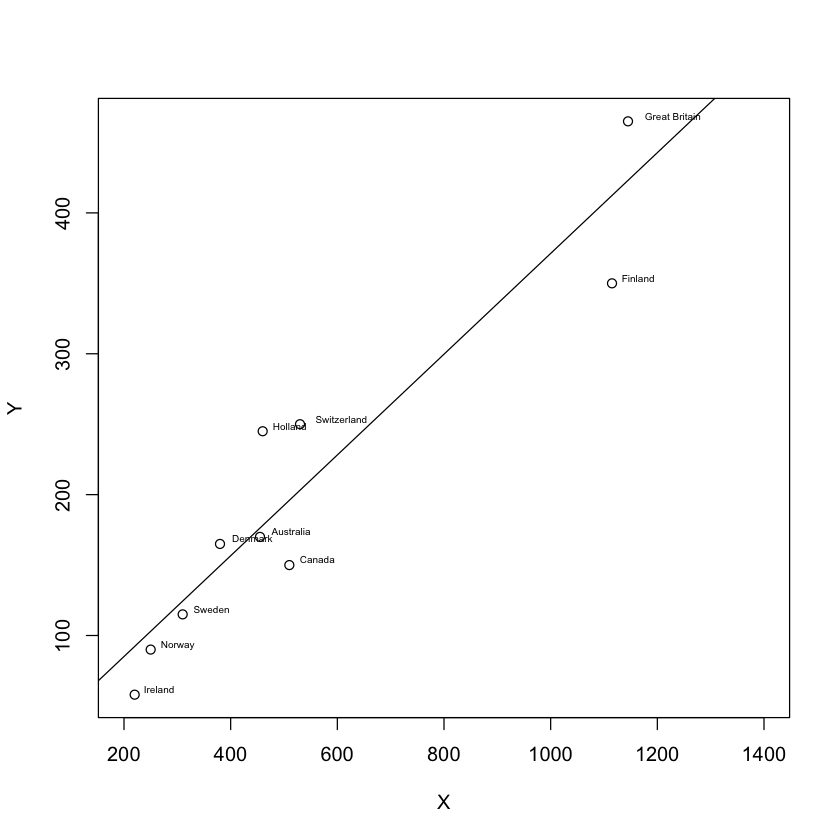

In [6]:
df2 <- E8.12[-4,]
Y <- df2$y # Response
X <- df2$x # Predictor
n <- length(X)

lm2 <- lm(Y~X)
(lms2 <- summary(lm2))

coefficients <- c('beta0', 'beta1')

beta0.hat <- coef(lms)[1]
beta1.hat <- coef(lms)[2]
beta.hat <- c(beta0.hat, beta1.hat)

txx <- sum((X - mean(X))^2)
MSE <- sum(lms$residuals^2)/(n-2)

# Calculate standard deviations
s.beta0.hat <- sqrt(MSE * (1/n + mean(X)^2/(txx)))
s.beta1.hat <- sqrt(MSE/txx)
s.beta.hat <- c(s.beta0.hat, s.beta1.hat)

Yhat <- beta0.hat + beta1.hat * X

lower.bound <- beta.hat - qt(1 - 0.05/2, df = n-2)*s.beta.hat
upper.bound <- beta.hat + qt(1 - 0.05/2, df = n-2)*s.beta.hat

(beta.intervals <- cbind(coefficients, lower.bound, beta.hat, upper.bound))
plot(X, Y, xlim=c(200,1400))
textxy(X, Y, df2$Country)
abline(lm2)

In this new regression, I note that the Multiple R-squared jumps significantly from  0.549 to 0.8855 and the Adjusted R-squared jumps significantly from 0.4 to 0.8 which suggests a much better fit.

Next, I try refitting the regression by putting the United States back and deleting Great Britain.


Call:
lm(formula = Y ~ X)

Residuals:
     Min       1Q   Median       3Q      Max 
-104.067  -36.633   -7.422   59.740   82.136 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 90.79998   41.14471   2.207   0.0584 .
X            0.15880    0.06354   2.499   0.0370 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 68.34 on 8 degrees of freedom
Multiple R-squared:  0.4384,	Adjusted R-squared:  0.3682 
F-statistic: 6.246 on 1 and 8 DF,  p-value: 0.03699


coefficients,lower.bound,beta.hat,upper.bound
beta0,-58.139505845977,65.7488570215489,189.637219889075
beta1,0.0377839553699408,0.229115337755516,0.420446720141092


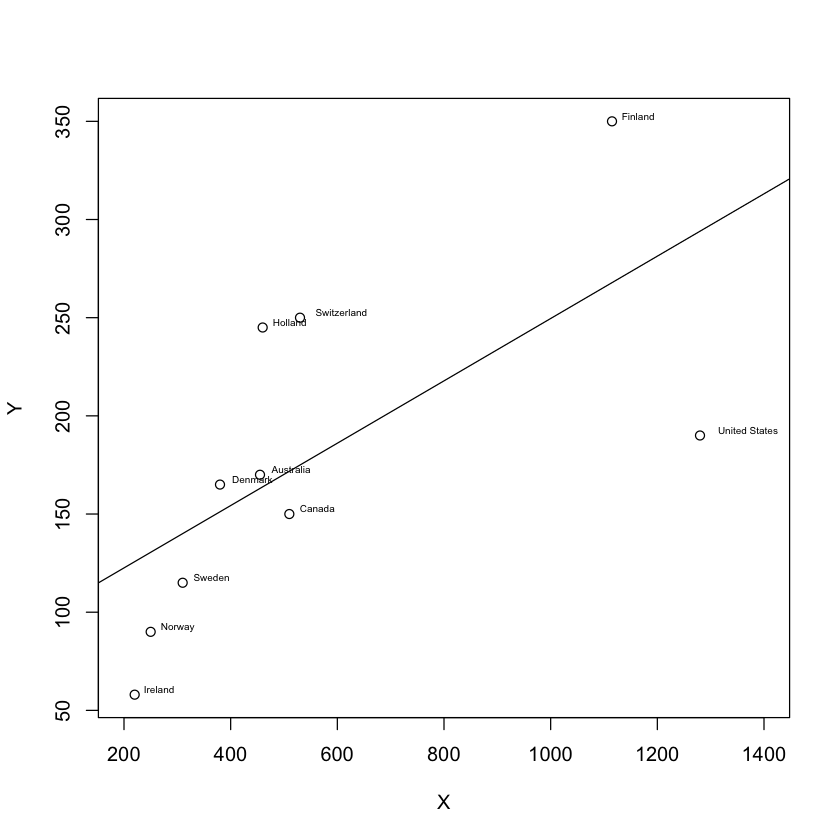

In [7]:
df3 <- E8.12[-6,]
Y <- df3$y # Response
X <- df3$x # Predictor
n <- length(X)

lm3 <- lm(Y~X)
(lm3 <- summary(lm3))

coefficients <- c('beta0', 'beta1')

beta0.hat <- coef(lms)[1]
beta1.hat <- coef(lms)[2]
beta.hat <- c(beta0.hat, beta1.hat)

txx <- sum((X - mean(X))^2)
MSE <- sum(lms$residuals^2)/(n-2)

# Calculate standard deviations
s.beta0.hat <- sqrt(MSE * (1/n + mean(X)^2/(txx)))
s.beta1.hat <- sqrt(MSE/txx)
s.beta.hat <- c(s.beta0.hat, s.beta1.hat)

Yhat <- beta0.hat + beta1.hat * X

lower.bound <- beta.hat - qt(1 - 0.05/2, df = n-2)*s.beta.hat
upper.bound <- beta.hat + qt(1 - 0.05/2, df = n-2)*s.beta.hat

(beta.intervals <- cbind(coefficients, lower.bound, beta.hat, upper.bound))
plot(X, Y, xlim=c(200,1400))
textxy(X, Y, df3$Country)
abline(lm(Y~X))

When I delete Great Britain from the regression, the Multiple R-squared drops from 0.549 to 0.4384 and the Adjusted R-squared falls from 0.4 to 0.3, suggesting that removing Great Britain (but keeping the US) creates a model that does not fit the data very well.

We see that in the US, the per capita cigarette consumption is relatively high while male death per million is relatively low. A possible explanation for this influential point could be that men may have stopped smoking between 1930 when the cigarette consumption data were collected and 1950 when the male death data were collected, resulting in a much lower male death count.

In Great Britain, we see the opposite trend. A possible explanation may be that the high male death count may come from other causes such as diseases unrelated to cigarette smoking. 